# 판다스 데이터 분석
---
판다스의 group by와 피벗 테이블 기능을 사용하여 데이터 분석을 수행한다.

필요한 패키지 로드하기

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



### 데이터 읽기
* primary에는, 미국내 주 - 카운티 별,   각 정당, 후보자의 데이터 및 득표율 데이터  
* counties라는 primary의 칼럼 중 fips라는 코드를 식별자를 하여, 각 유권자별 데이터가 나와있다.

In [20]:
primary = pd.read_csv("../data/primary_results.csv", sep=",")
counties = pd.read_csv("../data/county_facts.csv", sep=",")

In [21]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [22]:
counties

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.0,9.5,...,3.8,27.2,0,437493,898189,22843,150439,227,10426.65,4.2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.1,12.2,...,3.3,25.3,0,0,515644,25688,327363,145,3995.38,5.3
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.8,11.0,...,2.2,15.9,0,159375,413983,20626,35497,40,2081.26,10.1
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.9,20.1,...,0.0,26.9,0,12128,98308,12596,10175,4,2238.55,3.8


In [23]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [24]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [25]:
primary.shape

(13212, 8)

In [26]:
counties.shape

(3195, 54)

### 각 후보별 전체지역 득표수
primary 전체 DataFrame에 대해서 groupby()를 할 것인데, 기준열이 candidate열 이다.  

각 후보별로 데이터를 계산하므로,groupby()의 기준열로 쓰면, 각 성분인 후보들을 기준으로 데이터가 그룹화되서 계산할 수 있다.

그룹화된 결과물에서 DataFrame 전체가 아니고, votes열만 필요하므로, 그룹화된 결과물에 열인덱싱 처리를 해준다.

마지막으로, 득표수를 계산하려면, 그룹별로 votes열의 합을 구해야하기 때문에 sum()함수를 적용한다.

In [27]:
primary.groupby("candidate")["votes"].sum()

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [28]:
candidate_to_votes_s = primary.groupby("candidate")["votes"].sum().sort_values()

In [29]:
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

후보별 전체지역 득표수을 정렬한 것을, 수평 바 plot으로 나타내자.

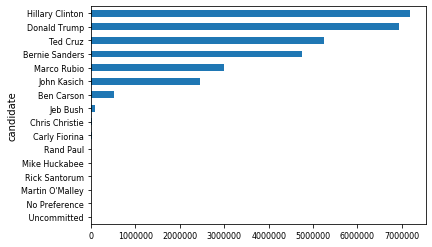

In [30]:
candidate_to_votes_s.plot(kind="barh", fontsize=8)

### 각 주별, 공화당과 민주당의, 득표비율 계산



In [31]:
# 데이터그룹화의 기준열을 state, party순으로 주어서, 각 주별 – 공화당/민주당 – 득표수(합)을 계산해보자.
state_party_votes_s = primary.groupby( ["state","party"] ) ["votes"].sum()

In [32]:
# 비율을 구하기 위해서, 각 주의 전체 득표수를 나누어줘야한다.
state_to_votes_s = primary.groupby("state")["votes"].sum()

In [33]:
state_party_to_vote_pcts_s = state_party_votes_s / state_to_votes_s
state_party_to_vote_pcts_s.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

이제 비율을 바탕으로 bar plot을 그려보자.

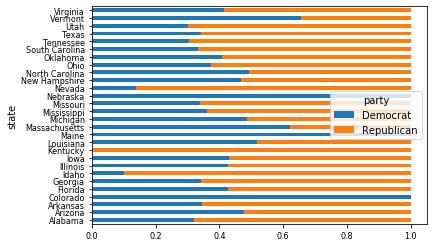

In [34]:
state_party_to_vote_pcts_s.unstack().plot(kind="barh", stacked=True, fontsize=8)

### 피벗 테이블(pivot_table)로 데이터 분석하기
각 주별, 당선자들의, 득표수, 총합


* primary라는 df에, 피컷테이블함수를 적용시키는데,
* values = 통계함수를 적용할 df의 특정열
* index = 그룹화의 1번째 기준이면서, 피벗테이블(df)의 index로 가져올 primary의 특정열
* columns = 그룹화의 2번째 기준이면서, 피벗테이블(df)의 columns로 가져올 primary의 특정열
* aggfunc = 2개의 그룹화기준을 가지고 values에 들어간 특정열에 적용시킬 통계함수를 문자열로 표현
* fill_value=0  NaN을 0으로 처리

In [35]:
total_votes = primary.pivot_table( values = "votes" , index="state" , columns ="candidate", aggfunc="sum", fill_value=0 )

각 주별(축약어), 정당들의, 득표율, 평균

In [36]:
primary.pivot_table(values="fraction_votes", index="state_abbreviation", columns="party", aggfunc="mean")

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,NaN
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013
